In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [3]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [4]:
df = pd.DataFrame(lista_alumnos, columns=['Nombre', 'Edad', 'Altura']) #Creamos un dataframe primeramente
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [5]:
df.info() #Vemos valores todos numéricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [6]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


##### Explorar tipos de relaciones en todo el conjunto de datos:

            Edad     Altura
count  21.000000  21.000000
mean   32.095238   1.727143
std     6.081980   0.079003
min    23.000000   1.600000
25%    27.000000   1.660000
50%    32.000000   1.720000
75%    36.000000   1.800000
max    45.000000   1.900000


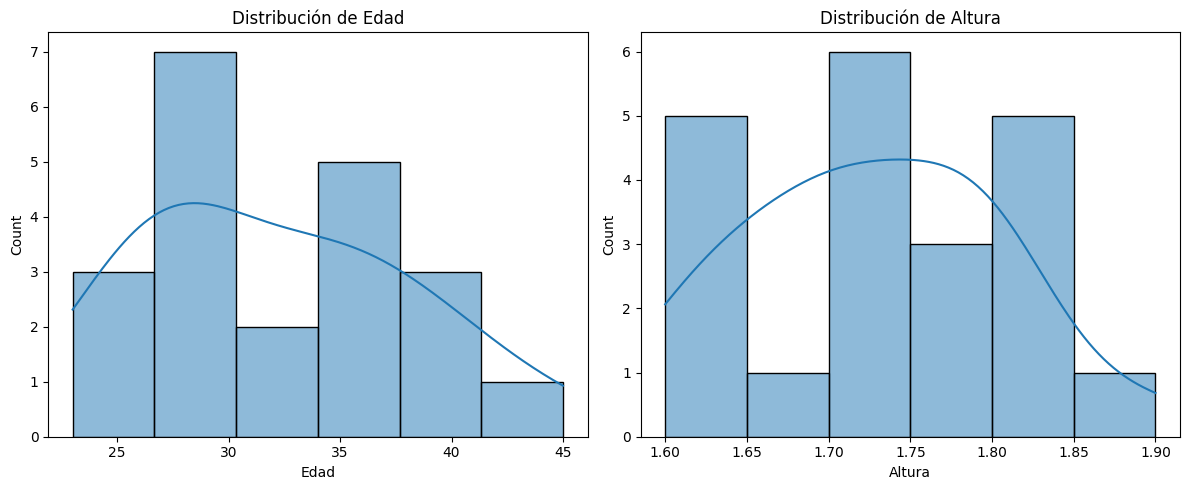

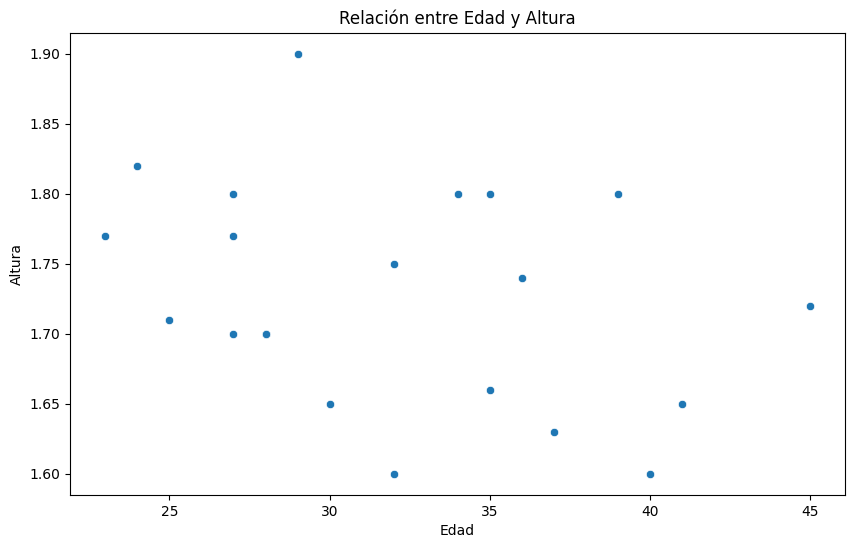

Correlación entre Edad y Altura: -0.3293
P-valor del test de normalidad para los residuos: 0.7140


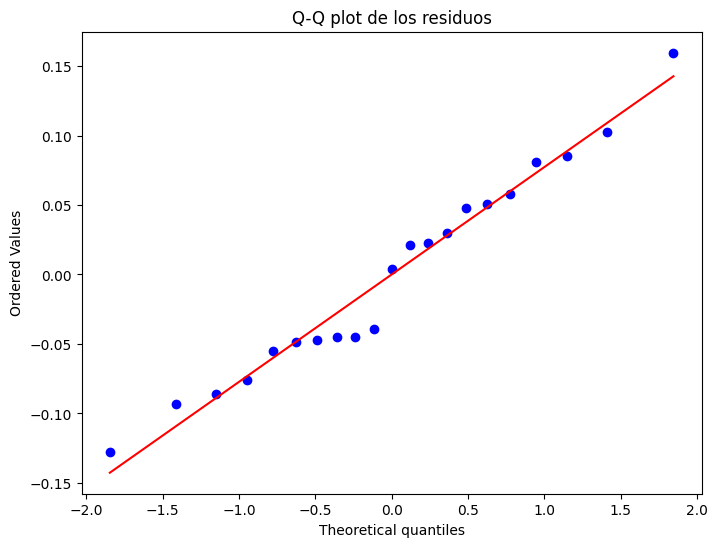

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Asumiendo que ya tienes el DataFrame 'df' creado

# 1. Estadísticas descriptivas básicas
print(df.describe())

# 2. Visualización de la distribución de las variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Edad'], kde=True, ax=ax1)
ax1.set_title('Distribución de Edad')

sns.histplot(df['Altura'], kde=True, ax=ax2)
ax2.set_title('Distribución de Altura')

plt.tight_layout()
plt.show()

# 3. Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad', y='Altura', data=df)
plt.title('Relación entre Edad y Altura')
plt.show()

# 4. Correlación
correlation = df['Edad'].corr(df['Altura'])
print(f"Correlación entre Edad y Altura: {correlation:.4f}")

# 5. Test de normalidad para los residuos
X = df['Edad'].values.reshape(-1, 1)
y = df['Altura'].values
model = LinearRegression()
model.fit(X, y)
residuos = y - model.predict(X)

_, p_value = stats.normaltest(residuos)
print(f"P-valor del test de normalidad para los residuos: {p_value:.4f}")

# 6. Gráfico Q-Q para los residuos
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=ax)
ax.set_title("Q-Q plot de los residuos")
plt.show()

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

##### Es probable que no encontremos una fuerte relación lineal, ya que la altura tiende a estabilizarse después de la adolescencia. Esto sugeriría que la regresión lineal podría no ser la mejor técnica para este problema particular

### Entrena un modelo de regresión lineal

y = a + b*x

altura = a + b*Edad

##### Entrenamiento del modelo:

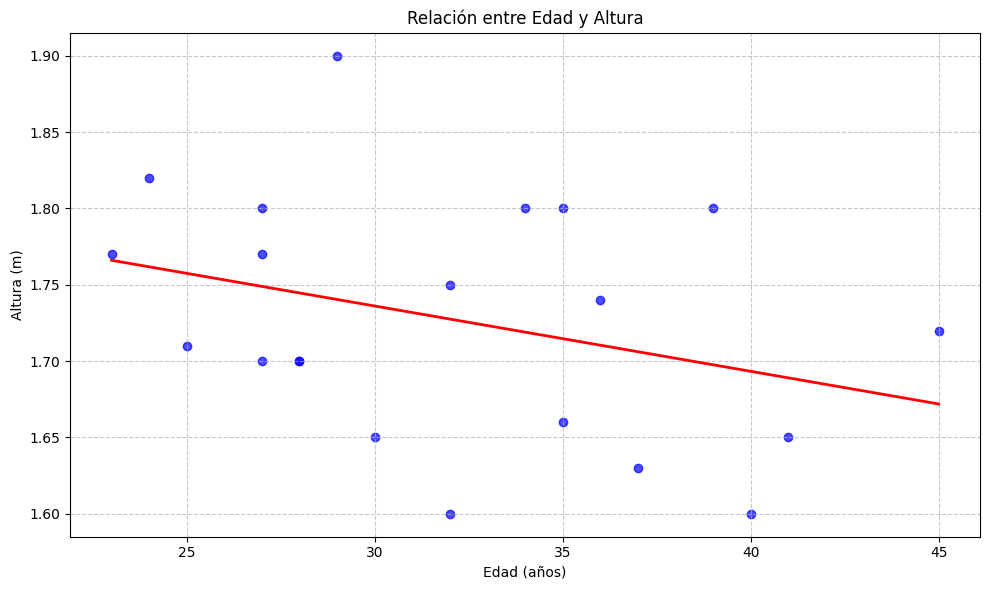

Ecuación de regresión: Altura = 1.8644 + -0.0043 * Edad


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create the DataFrame
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)]

df = pd.DataFrame(lista_alumnos, columns=['Nombre', 'Edad', 'Altura'])

# Prepare the data for linear regression
X = df['Edad'].values.reshape(-1, 1)
y = df['Altura'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate points for the regression line
X_line = np.array([[df['Edad'].min()], [df['Edad'].max()]])
y_line = model.predict(X_line)

# Create the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Edad'], df['Altura'], color='blue', alpha=0.7)
plt.plot(X_line, y_line, color='red', linewidth=2)

# Customize the plot
plt.title('Relación entre Edad y Altura')
plt.xlabel('Edad (años)')
plt.ylabel('Altura (m)')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print the regression equation
print(f"Ecuación de regresión: Altura = {model.intercept_:.4f} + {model.coef_[0]:.4f} * Edad")

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Asumiendo que ya tienes el DataFrame 'df' y el modelo ajustado 'model

# Hacer predicciones
y_pred = model.predict(X)

# Cálculo de errores usando sklearn
mae_sklearn = mean_absolute_error(y, y_pred)
mse_sklearn = mean_squared_error(y, y_pred)
rmse_sklearn = np.sqrt(mse_sklearn)
mape_sklearn = mean_absolute_percentage_error(y, y_pred) * 100

print("\nErrores calculados con sklearn:")
print(f"MAE: {mae_sklearn:.4f}")
print(f"MSE: {mse_sklearn:.4f}")
print(f"RMSE: {rmse_sklearn:.4f}")
print(f"MAPE: {mape_sklearn:.4f}%")


Errores calculados con sklearn:
MAE: 0.0631
MSE: 0.0053
RMSE: 0.0728
MAPE: 3.6582%


 ##### El error que se comete es la diferencia entre las alturas predichas por el modelo y las alturas reales de los estudiantes.